In [19]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
file = 'OSA_extreme_male.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

In [21]:
df = xl.parse('Sheet1')
df.head()



,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778


In [22]:
diag_gr = df.groupby('OSA', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
OSA,
Healthy,141
Severe,137


In [23]:
df.shape 
df.columns.values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 9 columns):
Patient     278 non-null object
Gender      278 non-null object
IAH         278 non-null float64
Weight      278 non-null int64
Height      278 non-null int64
Age         278 non-null int64
Cervical    278 non-null int64
OSA         278 non-null object
BMI         278 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 19.7+ KB


In [24]:
df.describe()

,IAH,Weight,Height,Age,Cervical,BMI
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,24.959928,92.417266,175.640288,47.543165,42.179856,29.908007
std,22.717228,18.591524,7.393047,12.222218,3.378103,5.452221
min,0.000000,61.000000,152.000000,22.000000,34.000000,20.619254
25%,4.800000,80.000000,170.000000,37.250000,40.000000,26.076872
50%,10.000000,89.000000,175.000000,47.000000,42.000000,29.005120
75%,40.875000,101.000000,180.000000,56.000000,44.000000,32.407407
max,102.000000,162.000000,197.000000,80.000000,53.000000,52.298554


In [25]:
df.skew()

IAH         0.685537
Weight      1.151605
Height      0.065467
Age         0.419207
Cervical    0.313431
BMI         1.270519
dtype: float64

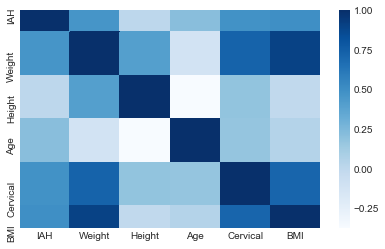

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

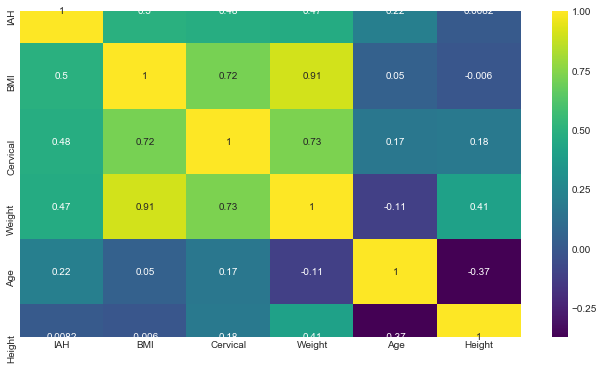

In [27]:
#IAH correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'IAH')['IAH'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [28]:
df.head()
#df = df.drop(['Patient','Gender','OSA'])
del df['Patient']
del df['Gender']
del df['OSA']
#df = df.drop("Patient", axis=1)
df.head()

,IAH,Weight,Height,Age,Cervical,BMI
0,9.0,80,173,32,40,26.729927
1,2.0,109,190,32,42,30.193906
2,34.0,86,169,39,42,30.110991
3,60.0,145,172,47,44,49.012980
4,3.7,90,180,36,40,27.777778


In [29]:
df.plot(kind="scatter", x="Cervical", y="IAH", 
            alpha=0.4, s=OSA_df["Weight"], label="Weight", figsize(10,7), colobar="True")

SyntaxError: positional argument follows keyword argument (<ipython-input-29-a44af93fa050>, line 2)

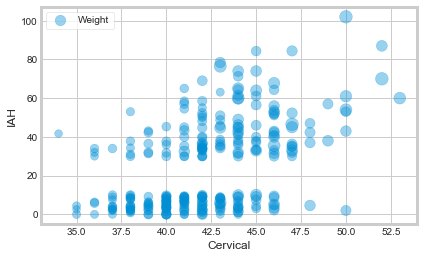

In [38]:
df.plot(kind="scatter", x="Cervical", y="IAH", alpha=0.4, s=df["Weight"], label="Weight")

In [31]:

df.head()

,IAH,Weight,Height,Age,Cervical,BMI
0,9.0,80,173,32,40,26.729927
1,2.0,109,190,32,42,30.193906
2,34.0,86,169,39,42,30.110991
3,60.0,145,172,47,44,49.012980
4,3.7,90,180,36,40,27.777778


In [32]:
l = df.columns.values
l


array(['IAH', 'Weight', 'Height', 'Age', 'Cervical', 'BMI'], dtype=object)

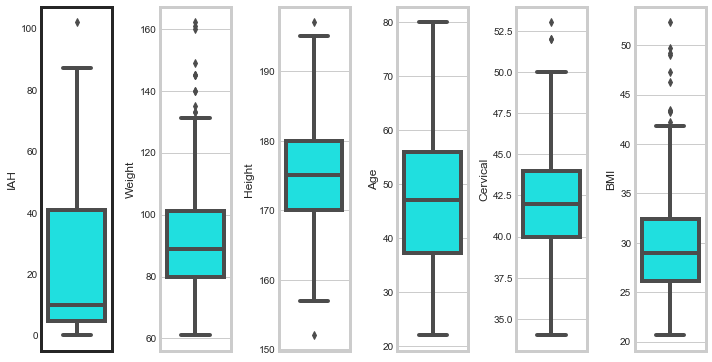

In [33]:
number_of_columns=6
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(10,30))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='cyan',orient='v')
    plt.tight_layout()

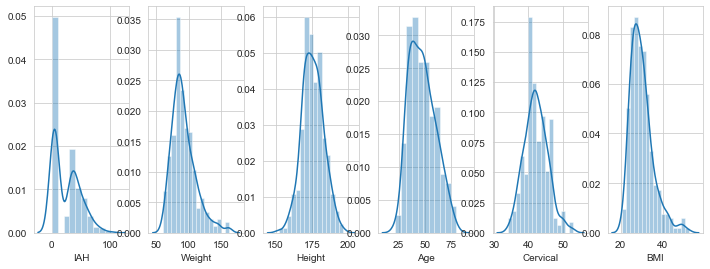

In [15]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)